In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation, writers
from mpl_toolkits.mplot3d import Axes3D
from skeleton import *

In [ ]:
"""
Simulate
"""
D = 3  # dimensions
N = 30  # number of particles, for solid use 32 or 108
rho = 0.8  # density
V = N / rho  # volume
L = V ** (1 / 3)  # side length box
lattice_spacing = L / 2.001  # only for solid, divide by 3.001 if N=108
temp = 1 * 119.9  # desired temperature
h = 1500  # number of timesteps
tspacing = 1e-3

Simulations = 150  # number of simulations
MSD_store = np.zeros((Simulations, h))
Temp_store = np.zeros((Simulations, h))
Solid = 0  # change to 0 if simulating gas or liquid

for i in range(Simulations):
    if Solid == 1:
        r0, v0 = init_fcc(L, lattice_spacing, 0, temp)
    else:
        r0, v0 = init_rv_uniform(3, N, L)
        v0 = init_v_gauss(N, temp)

    R, V, pott, r1, v1 = equalise_system(
        r0, v0, temp, L, grace_time=20, error=1, timespacing=1e-5, adaptive=True
    )

    # Creating a new simulation starting from equilibrium

    R, V = gen_rv_matrices(D, N, h)  # generating matrices for storage
    R, V = store_rv(R, V, r1, v1, 0)  # storing initial condions in matrix

    Rt, Vt, forcet, pott = Verlet_integrate_images(
        N, R, V, 1, h, 0, L, D=3, timespacing=tspacing
    )

    MSD_store[i, :] = MeanSquaredDisplacement(Vt, forcet, tspacing)

    np.save("../Data/Data_MSD/N_simulations_liquidMSD_Number", MSD_store)  # change to desired name
    np.save("../Data/Data_MSD/150_simulations_solidTemp_Number", Temp_store)

In [5]:
"""
Load the simulation data
"""
dataL = np.load("../Data/Data_MSD/150_simulations_liquidMSD_4.npy")
dataG = np.load("../Data/Data_MSD/150_simulations_gasMSD_4.npy")
dataS = np.load("../Data/Data_MSD/150_simulations_solidMSD_4.npy")
tempS = np.load("../Data/Data_MSD/150_simulations_solidTemp_4.npy")
tspacing = 1e-3
tspacingG = 1e-2

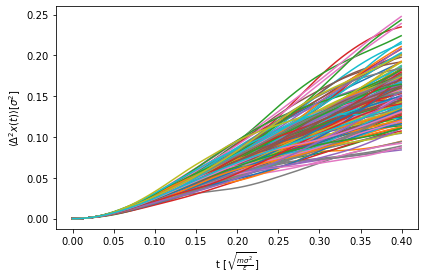

In [6]:
"""
Liquid data
"""
N_simL, hL = dataL.shape
tL = np.linspace(0, tspacing * hL, hL)
for i in range(N_simL):
    plt.plot(tL[:400], dataL[i, :400])

plt.xlabel(r"t [$\sqrt{\frac{m\sigma^2}{\epsilon}}$]")
plt.ylabel(r"$⟨Δ^2x(t)⟩ [\sigma^2]$")
plt.tight_layout()
plt.savefig("../figs/MSD_L.png")

Text(0.5, 1.0, 'Averaged MSD liquid Argon over 150 simulations')

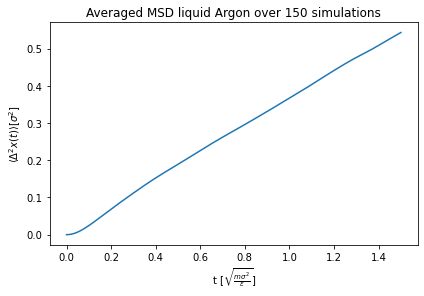

In [7]:
averagedMSD_L = np.mean(dataL, 0)
plt.plot(tL, averagedMSD_L)


plt.xlabel(r"t [$\sqrt{\frac{m\sigma^2}{\epsilon}}$]")
plt.ylabel(r"$⟨Δ^2x(t)⟩ [\sigma^2]$")
plt.tight_layout()
plt.savefig("../figs/MSD_L_averaged.png")
plt.title(r"Averaged MSD liquid Argon over 150 simulations")

Text(0.5, 1.0, 'Diffusion estimate liquid Argon 150 simulations')

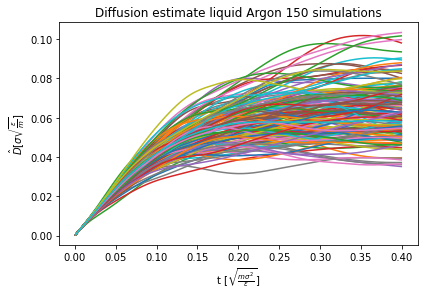

In [8]:
D_L = dataL[:, 1:] / tL[1:] / 6
for i in range(N_simL):
    plt.plot(tL[1:400], D_L[i, :399])


plt.xlabel(r"t [$\sqrt{\frac{m\sigma^2}{\epsilon}}$]")
plt.ylabel(r"$\hat{D} [\sigma\sqrt{\frac{\epsilon}{m}}]$")
plt.tight_layout()
plt.savefig("../figs/D_L.png")
plt.title(r"Diffusion estimate liquid Argon 150 simulations")

Text(0.5, 1.0, 'Averaged diffusion estimate liquid Argon over 150 simulations')

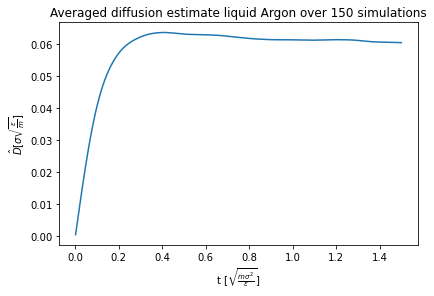

In [9]:
averagedD_L = np.mean(D_L, 0)
plt.plot(tL[1:], averagedD_L)


plt.xlabel(r"t [$\sqrt{\frac{m\sigma^2}{\epsilon}}$]")
plt.ylabel(r"$\hat{D} [\sigma\sqrt{\frac{\epsilon}{m}}]$")
plt.tight_layout()
plt.savefig("../figs/D_L_averaged.png")
plt.title(r"Averaged diffusion estimate liquid Argon over 150 simulations")

In [10]:
D_Lestimate = averagedD_L[-1]
D_Lestimate_error = np.sqrt(np.var(D_L[:, -1]))
print(
    "The diffusion coefficient for liquid Argon at T=1, rho=0.8 is "
    + str(D_Lestimate)
    + " plusmin "
    + str(D_Lestimate_error)
)

The diffusion coefficient for liquid Argon at T=1, rho=0.8 is 0.060341115966349765 plusmin 0.016479763783985836


Text(0.5, 1.0, 'MSD gaseous Argon 150 simulations')

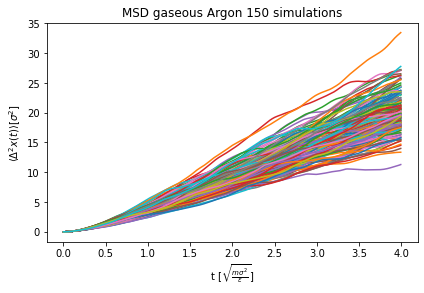

In [11]:
"""
Gas data
"""
N_simG, hG = dataG.shape
tG = np.linspace(0, tspacingG * hG, hG)
for i in range(N_simG):
    plt.plot(tG[:400], dataG[i, :400])


plt.xlabel(r"t [$\sqrt{\frac{m\sigma^2}{\epsilon}}$]")
plt.ylabel(r"$⟨Δ^2x(t)⟩ [\sigma^2]$")
plt.tight_layout()
plt.savefig("../figs/MSD_G.png")
plt.title(r"MSD gaseous Argon 150 simulations")

Text(0.5, 1.0, 'Averaged MSD gaseous Argon over 150 simulations')

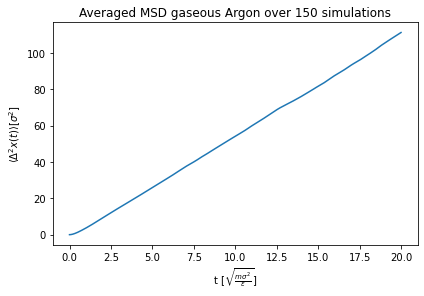

In [12]:
averagedMSD_G = np.mean(dataG, 0)
plt.plot(tG, averagedMSD_G)


plt.xlabel(r"t [$\sqrt{\frac{m\sigma^2}{\epsilon}}$]")
plt.ylabel(r"$⟨Δ^2x(t)⟩ [\sigma^2]$")
plt.tight_layout()
plt.savefig("../figs/MSD_G_averaged.png")
plt.title(r"Averaged MSD gaseous Argon over 150 simulations")

Text(0.5, 1.0, 'Diffusion estimate gaseous Argon 150 simulations')

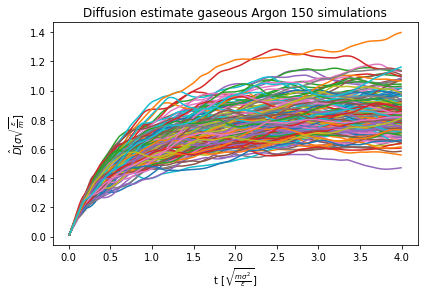

In [13]:
D_G = dataG[:, 1:] / tG[1:] / 6
for i in range(N_simG):
    plt.plot(tG[1:400], D_G[i, :399])


plt.xlabel(r"t [$\sqrt{\frac{m\sigma^2}{\epsilon}}$]")
plt.ylabel(r"$\hat{D} [\sigma\sqrt{\frac{\epsilon}{m}}]$")
plt.tight_layout()
plt.savefig("../figs/D_G.png")
plt.title(r"Diffusion estimate gaseous Argon 150 simulations")

Text(0.5, 1.0, 'Averaged diffusion estimate gaseous Argon over 150 simulations')

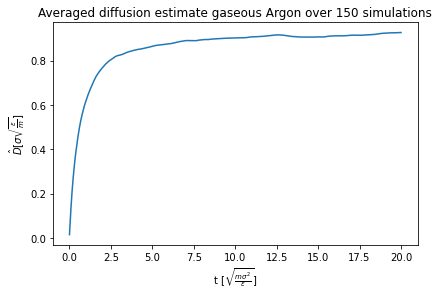

In [14]:
averagedD_G = np.mean(D_G, 0)
plt.plot(tG[1:], averagedD_G)


plt.xlabel(r"t [$\sqrt{\frac{m\sigma^2}{\epsilon}}$]")
plt.ylabel(r"$\hat{D} [\sigma\sqrt{\frac{\epsilon}{m}}]$")
plt.tight_layout()
plt.savefig("../figs/D_G_averaged.png")
plt.title(r"Averaged diffusion estimate gaseous Argon over 150 simulations")

In [15]:
D_Gestimate = averagedD_G[-1]
D_Gestimate_error = np.sqrt(np.var(D_G[:, -1]))
print(
    "The diffusion coefficient for Gaseous Argon at T=3, rho=0.3 is "
    + str(D_Gestimate)
    + " plusmin "
    + str(D_Gestimate_error)
)

The diffusion coefficient for Gaseous Argon at T=3, rho=0.3 is 0.9268689489923607 plusmin 0.1444097064838076


Text(0.5, 1.0, 'MSD solid Argon 150 simulations')

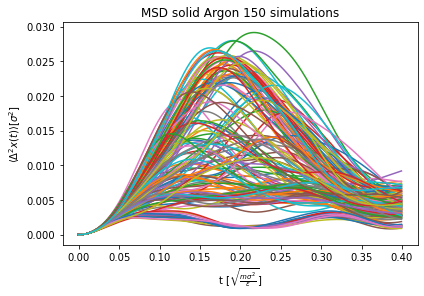

In [16]:
"""
Solid
"""
N_simS, hS = dataS.shape
tS = np.linspace(0, tspacing * hS, hS)
for i in range(N_simS):
    plt.plot(tS[:400], dataS[i, :400])


plt.xlabel(r"t [$\sqrt{\frac{m\sigma^2}{\epsilon}}$]")
plt.ylabel(r"$⟨Δ^2x(t)⟩ [\sigma^2]$")
plt.tight_layout()
plt.savefig("../figs/MSD_S.png")
plt.title(r"MSD solid Argon 150 simulations")

Text(0.5, 1.0, 'Averaged MSD solid Argon over time Vs Averaged system temperature')

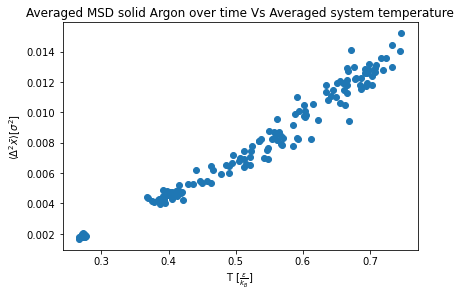

In [17]:
meanTempS = np.mean(tempS, 1) / 119.9
meanMSD_S = np.mean(dataS, 1)
plt.scatter(meanTempS, meanMSD_S)


plt.xlabel(r"T [$\frac{\epsilon}{k_B}}$]")
plt.ylabel(r"$⟨Δ^2\bar{x}⟩ [\sigma^2]$")
plt.tight_layout()
plt.savefig("../figs/T_Vs_MSD.png")
plt.title(r"Averaged MSD solid Argon over time Vs Averaged system temperature")

Text(0.5, 1.0, 'Averaged MSD solid Argon over 150 simulations')

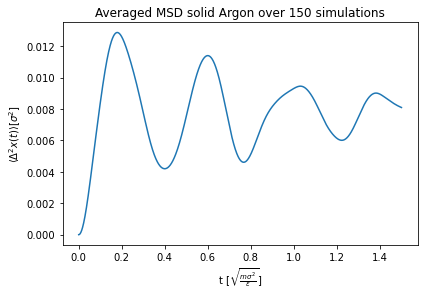

In [18]:
averagedMSD_S = np.mean(dataS, 0)
plt.plot(tS, averagedMSD_S)


plt.xlabel(r"t [$\sqrt{\frac{m\sigma^2}{\epsilon}}$]")
plt.ylabel(r"$⟨Δ^2x(t)⟩ [\sigma^2]$")
plt.tight_layout()
plt.savefig("../figs/MSD_S_averaged.png")
plt.title(r"Averaged MSD solid Argon over 150 simulations")

In [44]:
print("The diffusion coefficient for Solid Argon at T=0.5, rho=1.2 is " + str(0))

The diffusion coefficient for Solid Argon at T=0.5, rho=1.2 is 0
